Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2022/2023  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2022 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **23. listopada 2022. u 23:59h**

------------------------------

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [2]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/opt/python/envs/default/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:

In [138]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).

In [139]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(1)
phi = poly.fit_transform(X)
phi

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [140]:
from numpy import linalg

phiT = np.transpose(phi)
dotInverse = linalg.inv(phiT.dot(phi))
w = dotInverse.dot(phiT).dot(y)
print(w)

pinvW = linalg.pinv(phi).dot(y)
print(pinvW)

[2.2        0.45714286]
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

In [141]:
from sklearn.metrics import mean_squared_error

print("Primjeri:", X.transpose())

hx = np.transpose(w).dot(phiT)
print("h(x) =",hx)

error = mean_squared_error(y, hx)
print("Greška:", error)

Primjeri: [[0 1 2 4]]
h(x) = [2.2        2.65714286 3.11428571 4.02857143]
Greška: 2.042857142857143


### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [142]:
np.dot(np.linalg.inv(phi), y)

LinAlgError: LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [143]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

w = [reg.intercept_]
w.append(*[coef for coef in reg.coef_])
print(w)

new_error = mean_squared_error(y, reg.predict(X))

print("new_error:", new_error)
print("old_error:", error)

[2.2, 0.45714285714285713]
new_error: 2.042857142857143
old_error: 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [186]:
from numpy.random import normal
def make_labels(X, f, noise=0):
    return f(X) + normal(0, noise, size(X))

In [187]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [190]:
def function(x):
  return 5 + x - 2*x**2 - 5*x**3

X_second = np.ravel(make_instances(-5, 5, 50))
y_second = make_labels(X_second, function, 200).reshape(50,1)

X_second = X_second.reshape(50,1)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

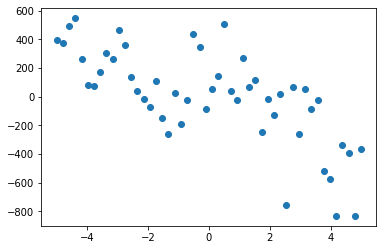

In [191]:
plt.scatter(X_second, y_second)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Error: 45706.81604875382


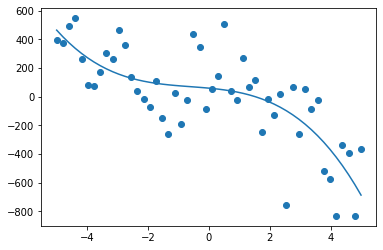

In [192]:
phi = PolynomialFeatures(3).fit_transform(X_second)
phiT = phi.transpose()

phiPlus = linalg.pinv(phi)
w = np.dot(phiPlus, y_second)
wT = w.transpose()

hx = wT.dot(phiT).reshape(50,1)
error = mean_squared_error(y_second, hx)

print("Error:", error)
plt.scatter(X_second, y_second)
plt.plot(X_second, hx)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

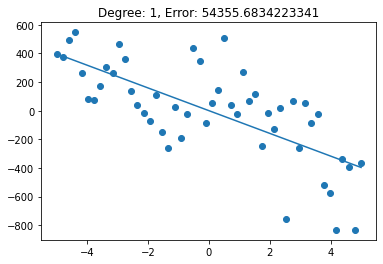

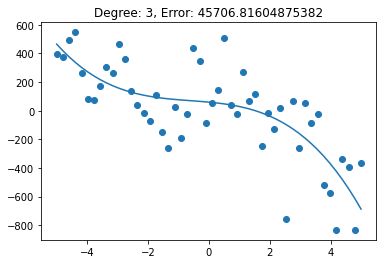

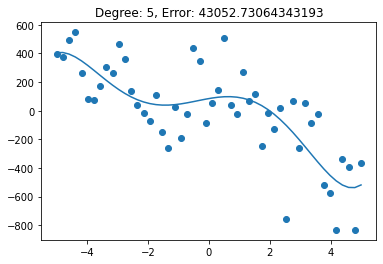

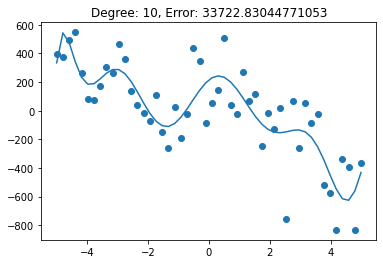

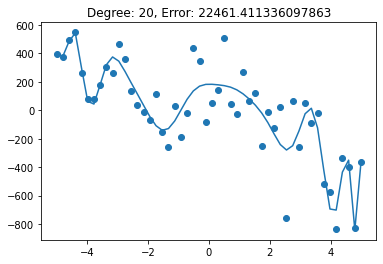

In [195]:
elements = [1, 3, 5, 10, 20]

for d in elements:
  phi = PolynomialFeatures(d).fit_transform(X_second)
  phiT = phi.transpose()

  phiPlus = linalg.pinv(phi)
  w = np.dot(phiPlus, y_second)
  wT = w.transpose()

  hx = wT.dot(phiT).reshape(50,1)
  error = mean_squared_error(y_second, hx)

  plt.figure()
  plt.scatter(X_second, y_second)
  plt.plot(X_second, hx)
  plt.title(f'Degree: {d}, Error: {error}')
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

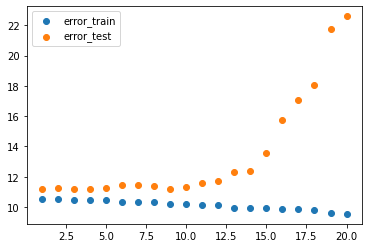

In [214]:
from sklearn.model_selection import train_test_split

X_train_3b, X_test_3b, y_train_3b, y_test_3b = train_test_split(X_second, y_second, test_size=0.5)

error_train = []
error_test = []

for d in range(1, 21):
  poly = PolynomialFeatures(d)
  phi_train = poly.fit_transform(X_train_3b)
  phi_test = poly.fit_transform(X_test_3b)
    
  phi_trainT = phi_train.transpose()
  phi_testT = phi_test.transpose()

  phiPlus = linalg.pinv(phi_train)
  w = np.dot(phiPlus, y_train_3b)
  wT = w.transpose()

  h_train = wT.dot(phi_trainT).flatten()
  h_test = wT.dot(phi_testT).flatten()

  error_train.append(log(mean_squared_error(y_train_3b, h_train)))
  error_test.append(log(mean_squared_error(y_test_3b, h_test)))

plt.scatter(range(1,21), error_train, label="error_train")
plt.scatter(range(1,21), error_test, label="error_test")
plt.legend()

### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

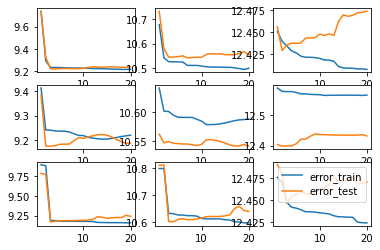

In [198]:
f, axxr = plt.subplots(3, 3)

X = np.ravel(make_instances(-5, 5, 1000))
X_train, X_test = train_test_split(X, test_size = 0.5)

i = 0
for N in [1/3, 2/3, 1]:
  j = 0
  for sigma in [100, 200, 500]:
    inner_X_train = X_train if N==1 else train_test_split(X, test_size = N, shuffle = False)[0]
    inner_X_test = X_test if N==1 else train_test_split(X, test_size=N, shuffle=False)[0]

    inner_y_train = make_labels(inner_X_train, function, sigma)
    inner_y_test = make_labels(inner_X_test, function, sigma)

    inner_X_train = inner_X_train.reshape(-1, 1)
    inner_X_test = inner_X_test.reshape(-1, 1)

    error_train = []
    error_test = []
    for degree in range(1, 21):
      poly = PolynomialFeatures(degree)
      phi_train = poly.fit_transform(inner_X_train)
      phi_test = poly.fit_transform(inner_X_test)
        
      phi_trainT = phi_train.transpose()
      phi_testT = phi_test.transpose()

      phiPlus = linalg.pinv(phi_train)
      w = phiPlus.dot(inner_y_train)
      wT = w.transpose()

      h_train = wT.dot(phi_trainT).flatten()
      h_test = wT.dot(phi_testT).flatten()

      error_train.append(log(mean_squared_error(inner_y_train, h_train)))
      error_test.append(log(mean_squared_error(inner_y_test, h_test)))
    
    axxr[i, j].plot(range(1, 21), error_train, label="error_train")
    axxr[i, j].plot(range(1, 21), error_test, label="error_test")
    j = j+1
  i = i + 1
plt.legend()
plt.show()

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [199]:
X_reg = np.array([0,1,2,4]).reshape(4,1)
y_reg = np.array([4,1,2,5])

for lamb in [0, 1, 10]:
  poly = PolynomialFeatures(3)
  phi = poly.fit_transform(X_reg)
  phiT = np.transpose(phi)
  
  lamb_diag = lamb * np.identity(4)
  lamb_diag[0][0] = 0

  first = linalg.inv(phiT.dot(phi) + lamb_diag).dot(phiT)
  w = first.dot(y_reg)
  print("lamda =", lamb, ":", w)

lamda = 0 : [ 4.         -5.91666667  3.375      -0.45833333]
lamda = 1 : [ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
lamda = 10 : [ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [201]:
from sklearn.linear_model import Ridge

for lamb in [0, 1, 10]:
  poly = PolynomialFeatures(3)
  phi = poly.fit_transform(X_reg)

  clf = Ridge(alpha=lamb)
  clf.fit(phi, y_reg)
  print("lamda =", lamb)
  w = [clf.intercept_]
  w.extend([coef for coef in clf.coef_[1:]])
  print(w)

lamda = 0
[4.000000000000028, -5.916666666666732, 3.375000000000027, -0.4583333333333364]
lamda = 1
[3.0569614512471652, -0.6907936507936514, -0.283174603174602, 0.1445804988662129]
lamda = 10
[2.4944418431229725, -0.1589729487341473, -0.13423066536848305, 0.08156009919705869]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

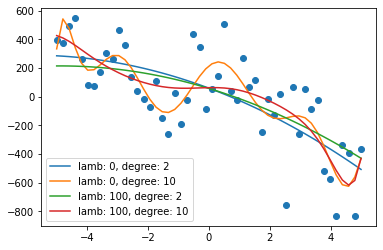

In [205]:
i = 0
for lamb in [0, 100]:
  j = 0
  for degree in [2, 10]:
    phi = PolynomialFeatures(degree).fit_transform(X_second)

    clf = Ridge(alpha=lamb)
    clf.fit(phi, y_second)

    h_X_line = clf.predict(phi)

    plt.plot(X_second, h_X_line, label=f'lamb: {lamb}, degree: {degree}')
    j = j+1
  i = i+1

plt.scatter(X_second, y_second)
plt.legend()
plt.show()

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?

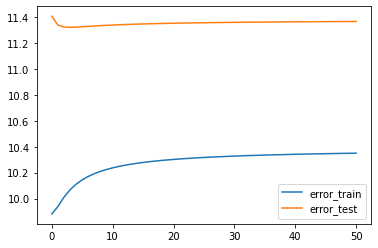

In [208]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_second, y_second, test_size=0.5)

error_train = []
error_test = []

for lamb in range(0, 51):
  poly = PolynomialFeatures(10)
  phi_train = poly.fit_transform(X_train)
  phi_test = poly.fit_transform(X_test)

  clf = Ridge(alpha=lamb)
  clf.fit(phi_train, y_train)

  h_train = clf.predict(phi_train)
  h_test = clf.predict(phi_test)

  error_train.append(log(mean_squared_error(y_train, h_train)))
  error_test.append(log(mean_squared_error(y_test, h_test)))

plt.plot(range(0,51), error_train, label="error_train")
plt.plot(range(0,51), error_test, label="error_test")
plt.legend()
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [215]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

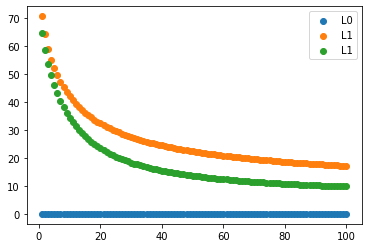

In [229]:
from sklearn.linear_model import Ridge

d = 5
L0 = []
L1 = []
L2 = []
for lamb in range(1, 101):
  poly = PolynomialFeatures(d)
  phi_train = poly.fit_transform(X_train_3b)
    
  clf = Ridge(alpha=lamb)
  clf.fit(phi_train, y_train_3b)

  L0.append(nonzeroes(clf.coef_))
  L1.append(np.absolute(clf.coef_).sum())
  L2.append(sqrt(clf.coef_.dot(clf.coef_.transpose())))
    
plt.scatter(range(1, 101), L0, label="L0")
plt.scatter(range(1, 101), L1, label="L1")
plt.scatter(range(1, 101), L2, label="L1")
plt.legend()
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

In [230]:
from sklearn.linear_model import Lasso

d = 5
for lamb in range(1, 101):
  poly = PolynomialFeatures(d)
  phi_train = poly.fit_transform(X_train_3b)
    
  clf = Lasso(alpha=lamb)
  clf.fit(phi_train, y_train_3b)

  print(f"lambda: {lamb}, coefs: {clf.coef_}")

lambda: 1, coefs: [  0.         -68.83056203  -3.82937027   2.15057067   0.24636651
  -0.11096196]
lambda: 2, coefs: [  0.         -65.75322777  -3.80161559   1.74209996   0.24563634
  -0.09908929]
lambda: 3, coefs: [  0.         -62.67028199  -3.77431865   1.33282249   0.24492481
  -0.08719215]
lambda: 4, coefs: [  0.         -59.58835636  -3.7469385    0.92369168   0.24420989
  -0.07529945]
lambda: 5, coefs: [  0.         -56.50686283  -3.71952311   0.514623     0.24349354
  -0.06340864]
lambda: 6, coefs: [ 0.00000000e+00 -5.34259238e+01 -3.69206248e+00  1.05634036e-01
  2.42775341e-01 -5.15202428e-02]
lambda: 7, coefs: [ 0.00000000e+00 -5.23630254e+01 -3.59526397e+00  0.00000000e+00
  2.39354314e-01 -4.90243804e-02]
lambda: 8, coefs: [ 0.00000000e+00 -5.20121719e+01 -3.44610554e+00 -0.00000000e+00
  2.33869453e-01 -4.97795390e-02]
lambda: 9, coefs: [ 0.00000000e+00 -5.01770739e+01 -3.37205442e+00 -2.19279376e-01
  2.31399443e-01 -4.37975480e-02]
lambda: 10, coefs: [ 0.00000000e+00 -

/opt/python/envs/default/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.517e+02, tolerance: 2.182e+02
  model = cd_fast.enet_coordinate_descent(


### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [231]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

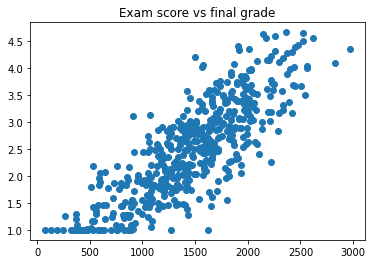

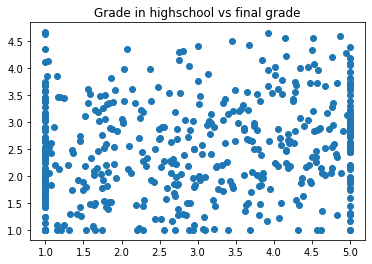

In [239]:
plt.scatter(exam_score, grades_y)
plt.title("Exam score vs final grade")
plt.show()
plt.scatter(grade_in_highschool, grades_y)
plt.title("Grade in highschool vs final grade")
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [249]:
from sklearn.linear_model import Ridge

lamb = 0.01

clf = Ridge(alpha=lamb)
clf.fit(grades_X, grades_y)
w = [clf.intercept_]
w.extend([coef for coef in clf.coef_])

print(w)

[0.15061179575776018, 0.0014149686631874095, 0.09477275879174099]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [256]:
from sklearn.preprocessing import StandardScaler

lamb = 0.01

scaler = StandardScaler()
grades_X_fixed = scaler.fit(grades_X).transform(grades_X)
grades_y_fixed = scaler.fit(grades_y.reshape(-1,1)).transform(grades_y.reshape(-1,1))

clf = Ridge(alpha=lamb)
clf.fit(grades_X_fixed, grades_y_fixed)
w = [clf.intercept_]
w.extend(*[coef for coef in clf.coef_])

print(w)

[array([8.62551331e-17]), 0.8163037502836593, 0.15167761205975833]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [259]:
grades_X_fixed_colinear = np.hstack((grades_X_fixed, np.tile(grades_X_fixed[:, [-1]], 1)))
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [261]:
from sklearn.preprocessing import StandardScaler

lamb = 0.01

clf = Ridge(alpha=lamb)
clf.fit(grades_X_fixed_colinear, grades_y_fixed)
w = [clf.intercept_]
w.extend(*[coef for coef in clf.coef_])

print(w)

[array([8.6255971e-17]), 0.8163036374131403, 0.07583956858529717, 0.07583956858880847]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [264]:
coefs = [[], [], []]
for i in range(1,11):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)

    for lamb in [0.01, 1000]:
        clf = Ridge(alpha=lamb)
        clf.fit(grades_X_fixed_colinear, grades_y_fixed)
        for i in range(0,3):
            coefs[i].append(clf.coef_[0][i])

print(np.std(coefs[0]))
print(np.std(coefs[1]))
print(np.std(coefs[2]))

0.2714107979255769
0.013937965918900508
0.013937965920656149


**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.